## 0. Install and Import Dependencies

In [1]:
!pip install mediapipe opencv-python pandas scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import mediapipe as mp
import cv2 
import numpy as np

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [3]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_pose = mp.solutions.pose

In [4]:
VIDEO_PATH = 'press.avi'
EXPORT_PATH = 'C:/Users/OS/Desktop/Kicking'
MODEL_PATH = 'hips.pkl'

## 1. Make Some Detections

In [6]:
import cv2
import mediapipe as mp

# Set the path to your local MP4 file
file_path = 'C:/Users/OS/Desktop/Kicking/kicking3.mp4'

# Initialize MediaPipe and VideoCapture
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = cap.get(cv2.CAP_PROP_FPS)
output_file = 'output.avi'

# Initialize VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # You can change the codec as needed
videoWriter = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, image = cap.read()

        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                  mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                  mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        cv2.imshow('Raw Webcam Feed', image)
        videoWriter.write(image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
videoWriter.release()
cv2.destroyAllWindows()


### 1.x Save Video

In [4]:
cap = cv2.VideoCapture(0)

height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
fps = cap.get(cv2.CAP_PROP_FPS)
videoWriter = cv2.VideoWriter('press.avi', cv2. VideoWriter_fourcc('P', 'I','M', '1'), fps, (int(width), int(height)))

while cap.isOpened():
    ret, frame = cap.read()

    try:
        cv2.imshow('Press', frame)
        videoWriter.write(frame)
    except Exception as e:
        print(f"Error: {str(e)}")
        break

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
videoWriter.release()
cv2.destroyAllWindows()

# 2. Capture Landmarks & Export to CSV

In [4]:
import csv
import os
import numpy as np
from matplotlib import pyplot as plt

In [5]:
landmarks = ['class']
for val in range(1, 33+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [9]:
landmarks[1:]

['x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 'x33',
 'y3

In [10]:
with open('kicking.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [6]:
def export_landmark(results, action):
    try:
        keypoints = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist() 
        keypoints.insert(0, action)

        with open('kicking.csv', mode='a', newline='') as f:
            csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            csv_writer.writerow(keypoints)
    except Exception as e:
        pass


In [8]:
results.pose_landmarks

NameError: name 'results' is not defined

In [9]:
export_landmark(results, 'kicking')

NameError: name 'results' is not defined

In [14]:
cap = cv2.VideoCapture('output.avi')
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the maximum window size (adjust these values as needed)
max_window_width = 1280
max_window_height = 720

# Calculate the scaling factor to fit the video within the window
scale_factor = min(max_window_width / frame_width, max_window_height / frame_height)

# Calculate the new frame dimensions
new_width = int(frame_width * scale_factor)
new_height = int(frame_height * scale_factor)

# Initialize the Pose model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Check if the video frame was read successfully
        if not ret:
            break

        # Resize the video frame to fit within the window
        frame = cv2.resize(frame, (new_width, new_height))

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to RGB for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        k = cv2.waitKey(1)
        if k == ord('k'):
            export_landmark(results, 'kicking')
        if k == ord('n'):
            export_landmark(results, 'normal')

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [11]:
cap.release()
cv2.destroyAllWindows()

# 3. Train Custom Model Using Scikit Learn

## 3.1 Read in Collected Data and Process

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('kicking.csv')

In [9]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,kicking,0.477090,0.121463,-1.689186,0.999147,0.521579,0.043537,-1.675154,0.997954,0.546425,...,1.779298,0.152455,0.574957,1.554650,1.613209,0.166124,0.448068,1.486767,1.558311,0.153135
1,normal,0.479517,0.143101,-0.419198,0.999882,0.488209,0.127181,-0.392577,0.999613,0.493845,...,0.354987,0.885809,0.518144,0.974924,0.228529,0.972726,0.385012,0.966602,0.186967,0.976151
2,normal,0.437795,0.152572,-0.472905,0.999915,0.445391,0.135871,-0.450807,0.999697,0.451460,...,0.293379,0.900915,0.489077,0.968645,0.116839,0.978807,0.381839,0.956735,0.133491,0.980749
3,normal,0.438371,0.152358,-0.449736,0.999909,0.445561,0.135915,-0.429230,0.999662,0.451838,...,0.330634,0.905741,0.488943,0.968737,0.116442,0.979748,0.356868,0.960757,0.176464,0.981763
4,normal,0.438882,0.152549,-0.501547,0.999907,0.446123,0.136501,-0.478914,0.999657,0.452394,...,0.323128,0.907741,0.489704,0.969510,0.113097,0.980508,0.345301,0.965335,0.167061,0.982540


In [10]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
2188,kicking,0.181185,0.040380,-0.644514,0.999499,0.187336,0.016915,-0.620350,0.999003,0.195287,...,0.497767,0.386970,0.313361,1.086987,0.506665,0.648304,0.245828,1.160082,0.288505,0.607452
2189,kicking,0.181157,0.041995,-0.636516,0.999384,0.187347,0.018602,-0.588334,0.998625,0.195289,...,0.463743,0.398092,0.305301,1.072382,0.434519,0.644544,0.240022,1.143897,0.256820,0.608774
2190,kicking,0.177565,0.041886,-0.646966,0.999338,0.185319,0.018244,-0.618856,0.998444,0.194490,...,0.479183,0.399525,0.305419,1.080397,0.453923,0.629529,0.236753,1.143267,0.257833,0.600665
2191,kicking,0.175122,0.042005,-0.624133,0.999274,0.184409,0.016190,-0.598832,0.998201,0.193464,...,0.529672,0.415071,0.290414,1.074575,0.403097,0.626601,0.231410,1.135382,0.329165,0.605032
2192,kicking,0.175314,0.042383,-0.600760,0.999201,0.184324,0.016954,-0.582827,0.997961,0.193161,...,0.460840,0.414438,0.317124,1.077975,0.400704,0.608902,0.234038,1.135033,0.259127,0.592731


In [9]:
df[df['class']=='kicking']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,kicking,0.477090,0.121463,-1.689186,0.999147,0.521579,0.043537,-1.675154,0.997954,0.546425,...,1.779298,0.152455,0.574957,1.554650,1.613209,0.166124,0.448068,1.486767,1.558311,0.153135
1128,kicking,0.455410,0.183486,-0.340730,0.999976,0.463459,0.168159,-0.326641,0.999908,0.468804,...,0.214068,0.936172,0.449341,0.940854,-0.054454,0.986301,0.341213,0.894120,0.086877,0.986428
1129,kicking,0.459869,0.178386,-0.410451,0.999972,0.466659,0.163768,-0.399117,0.999882,0.471969,...,0.220079,0.964572,0.442520,0.940982,-0.016056,0.991925,0.265880,0.872924,0.091552,0.992447
1130,kicking,0.459819,0.180525,-0.403443,0.999971,0.466338,0.165167,-0.393609,0.999878,0.471726,...,0.218631,0.966358,0.442559,0.941092,-0.019463,0.992314,0.265809,0.873433,0.084492,0.992831
1131,kicking,0.455273,0.181613,-0.401340,0.999971,0.460647,0.165792,-0.392662,0.999878,0.465723,...,0.232834,0.967490,0.442662,0.941686,-0.075361,0.992523,0.264887,0.874407,0.106959,0.992906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,kicking,0.181185,0.040380,-0.644514,0.999499,0.187336,0.016915,-0.620350,0.999003,0.195287,...,0.497767,0.386970,0.313361,1.086987,0.506665,0.648304,0.245828,1.160082,0.288505,0.607452
2189,kicking,0.181157,0.041995,-0.636516,0.999384,0.187347,0.018602,-0.588334,0.998625,0.195289,...,0.463743,0.398092,0.305301,1.072382,0.434519,0.644544,0.240022,1.143897,0.256820,0.608774
2190,kicking,0.177565,0.041886,-0.646966,0.999338,0.185319,0.018244,-0.618856,0.998444,0.194490,...,0.479183,0.399525,0.305419,1.080397,0.453923,0.629529,0.236753,1.143267,0.257833,0.600665
2191,kicking,0.175122,0.042005,-0.624133,0.999274,0.184409,0.016190,-0.598832,0.998201,0.193464,...,0.529672,0.415071,0.290414,1.074575,0.403097,0.626601,0.231410,1.135382,0.329165,0.605032


In [10]:
X = df.drop('class', axis=1)
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4000)

In [14]:
y_test

241      normal
688      normal
2102    kicking
1990    kicking
1585    kicking
         ...   
1654    kicking
737      normal
1659    kicking
467      normal
2109    kicking
Name: class, Length: 658, dtype: object

## 3.2 Train Machine Learning Classification Model

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [13]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [14]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())])}

In [16]:
fit_models['rc'].predict(X_test)

array(['normal', 'normal', 'kicking', 'kicking', 'kicking', 'normal',
       'normal', 'kicking', 'kicking', 'kicking', 'normal', 'kicking',
       'kicking', 'normal', 'normal', 'kicking', 'kicking', 'normal',
       'kicking', 'normal', 'kicking', 'kicking', 'normal', 'kicking',
       'normal', 'kicking', 'normal', 'normal', 'normal', 'kicking',
       'kicking', 'normal', 'kicking', 'normal', 'normal', 'normal',
       'normal', 'kicking', 'kicking', 'kicking', 'kicking', 'normal',
       'kicking', 'normal', 'normal', 'kicking', 'kicking', 'normal',
       'kicking', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'kicking', 'normal', 'kicking',
       'kicking', 'normal', 'normal', 'kicking', 'kicking', 'kicking',
       'kicking', 'normal', 'normal', 'normal', 'kicking', 'kicking',
       'normal', 'normal', 'normal', 'normal', 'kicking', 'kicking',
       'kicking', 'normal', 'kicking', 'kicking', 'normal', 'normal',
       'kicking', 'kic

## 3.3 Evaluate and Serial Model

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle

In [18]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test.values, yhat), 
          precision_score(y_test.values, yhat, average="binary", pos_label="kicking"),
          recall_score(y_test.values, yhat, average="binary", pos_label="kicking"))

lr 0.9802431610942249 0.9905956112852664 0.9693251533742331
rc 0.9817629179331308 0.990625 0.9723926380368099
rf 0.9954407294832827 0.9969230769230769 0.9938650306748467
gb 0.9954407294832827 1.0 0.99079754601227


In [19]:
yhat = fit_models['rf'].predict(X_test)

In [20]:
yhat[:10]

array(['normal', 'normal', 'kicking', 'kicking', 'kicking', 'normal',
       'normal', 'kicking', 'kicking', 'kicking'], dtype=object)

In [21]:
with open('deadlift.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 4. Make Detections with Model

In [22]:
with open('deadlift.pkl', 'rb') as f:
    model = pickle.load(f)

In [26]:
X = pd.DataFrame([row], columns=landmarks[1:])

NameError: name 'row' is not defined

In [28]:
cap = cv2.VideoCapture("C:/Users/OS/Pictures/Camera Roll/17-11-2023.mp4")
counter = 0
current_stage = ''
# Initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = pose.process(image)

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                mp_drawing.DrawingSpec(color=(245,117,230), thickness=2, circle_radius=2)
                                )

        try:
            row = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten().tolist()
            X = pd.DataFrame([row], columns=landmarks[1:])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
        
    
            if body_language_class == 'kicking' and body_language_prob[body_language_prob.argmax()] >= .7:
                current_stage = 'kicking'

            ## not sure
            elif current_stage == 'kicking' and body_language_class == 'normal' and body_language_prob[body_language_prob.argmax()] < .7:
                current_stage="normal"
                counter += 1
                print(current_stage)

            # Get status box
            cv2.rectangle(image, (0,0), (300, 60), (245, 117, 16), -1)
    
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (130, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (125, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
            # Display Probability
            cv2.putText(image, 'COUNT'
                        , (250, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(counter)
                        , (245, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        except Exception as e:
            pass
    
        cv2.imshow('Raw Webcam Feed', image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

normal [0.24 0.76]
normal [0.39 0.61]
normal [0.38 0.62]
normal [0.39 0.61]
normal [0.38 0.62]
normal [0.35 0.65]
normal [0.32 0.68]
normal [0.31 0.69]
normal [0.27 0.73]
normal [0.26 0.74]
normal [0.22 0.78]
normal [0.16 0.84]
normal [0.17 0.83]
normal [0.12 0.88]
normal [0.12 0.88]
normal [0.1 0.9]
normal [0.07 0.93]
normal [0.05 0.95]
normal [0.05 0.95]
normal [0.04 0.96]
normal [0.03 0.97]
normal [0.04 0.96]
normal [0.04 0.96]
normal [0.02 0.98]
normal [0.02 0.98]
normal [0.02 0.98]
normal [0.02 0.98]
normal [0.02 0.98]
normal [0.01 0.99]
normal [0.03 0.97]
normal [0.06 0.94]
normal [0.07 0.93]
normal [0.1 0.9]
normal [0.1 0.9]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.12 0.88]
normal [0.1 0.9]
normal [0.09 0.91]
normal [0.09 0.91]
normal [0.09 0.91]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.11 0.89]
normal [0.1 0.9]
normal [0.12 0.88]
normal [0.16 0.84]
normal [0.19 0.81]
normal [0.25 0.75]
nor

In [27]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
714,0.467136,0.142144,-0.671694,0.999998,0.471101,0.127963,-0.610211,0.999990,0.476748,0.128754,...,0.566786,0.695832,0.420463,0.707884,0.348741,0.879103,0.357255,0.720300,0.328085,0.842957
475,0.667837,0.169028,-0.300352,0.999789,0.681124,0.155365,-0.275095,0.999353,0.690153,0.154329,...,0.606734,0.724346,0.792467,0.667940,0.076583,0.898110,0.651779,0.648494,0.429327,0.911406
366,0.576876,0.182227,-0.465660,0.999965,0.589916,0.169719,-0.439280,0.999911,0.599329,0.169119,...,0.670200,0.676821,0.698982,0.653606,0.104304,0.901752,0.557313,0.639736,0.468806,0.884317
746,0.481530,0.140057,-0.513151,0.999994,0.486077,0.126545,-0.469518,0.999972,0.492670,0.127489,...,0.396585,0.630713,0.457826,0.706891,0.286721,0.811731,0.370132,0.721978,0.225588,0.805373
330,0.560235,0.181366,-0.412827,0.999973,0.572795,0.168688,-0.382734,0.999922,0.581967,0.167664,...,0.508884,0.724202,0.702086,0.650721,0.092885,0.899326,0.571424,0.651273,0.318394,0.900388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,0.576116,0.180991,-0.661196,0.999920,0.588281,0.167371,-0.646786,0.999799,0.597358,0.166186,...,0.683739,0.787379,0.698253,0.655145,0.192105,0.925259,0.560326,0.652970,0.465681,0.923787
53,0.572813,0.156883,-0.579567,0.999967,0.586977,0.143330,-0.559711,0.999905,0.596410,0.142996,...,0.696414,0.760142,0.665816,0.631066,0.224033,0.930895,0.530099,0.624521,0.500386,0.921860
294,0.582124,0.178572,-0.433725,0.999950,0.595545,0.166313,-0.400334,0.999843,0.605417,0.165828,...,0.619783,0.735587,0.704910,0.654693,0.069138,0.922679,0.548029,0.644951,0.400625,0.910573
723,0.468719,0.142507,-0.618523,0.999998,0.474544,0.128079,-0.558823,0.999987,0.480267,0.128987,...,0.432348,0.658979,0.421856,0.707751,0.411994,0.874224,0.360218,0.721543,0.202635,0.830655


In [22]:
def describe_dataset(dataset_path: str):
    data = pd.read_csv(dataset_path)
    return data

def round_up_metric_results(results) -> list:
    '''Round up metrics results such as precision score, recall score, ...'''
    return list(map(lambda el: round(el, 3), results))

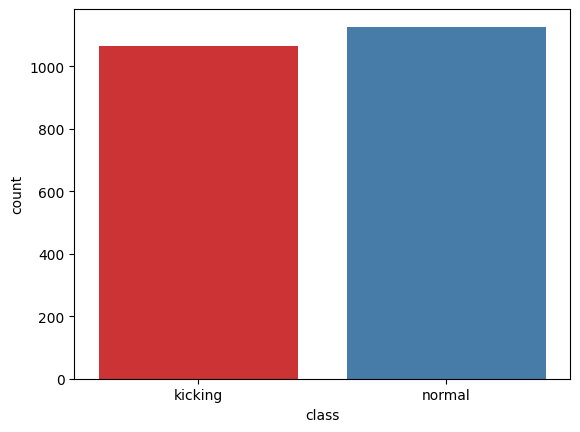

In [23]:
df = describe_dataset("./kicking.csv")
sns.countplot(x='class', data=df, palette="Set1") 
df.loc[df["class"] == "kicking", "class"] = 0
df.loc[df["class"] == "normal", "class"] = 1

In [24]:
X = df.drop("class", axis=1)
y = df["class"].astype('int')

sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [25]:
# Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
y_test.head(3)

907     1
324     1
2021    0
Name: class, dtype: int32

In [26]:
algorithms =[("LR", LogisticRegression()),
         ("SVC", SVC(probability=True)),
         ('KNN',KNeighborsClassifier()),
         ("DTC", DecisionTreeClassifier()),
         ("SGDC", CalibratedClassifierCV(SGDClassifier())),
         ("NB", GaussianNB()),
         ('RF', RandomForestClassifier()),]

models = {}
final_results = []

for name, model in algorithms:
    trained_model = model.fit(X_train, y_train)
    models[name] = trained_model

    # Evaluate model
    model_results = model.predict(X_test)

    p_score = precision_score(y_test, model_results, average=None, labels=[0, 1])
    a_score = accuracy_score(y_test, model_results)
    r_score = recall_score(y_test, model_results, average=None, labels=[0, 1])
    f1_score_result = f1_score(y_test, model_results, average=None, labels=[0, 1])
    cm = confusion_matrix(y_test, model_results, labels=[0, 1])
    final_results.append(( name,  round_up_metric_results(p_score), a_score, round_up_metric_results(r_score), round_up_metric_results(f1_score_result), cm))

# Sort results by F1 score
final_results.sort(key=lambda k: sum(k[4]), reverse=True)
pd.DataFrame(final_results, columns=["Model", "Precision Score", "Accuracy score", "Recall Score", "F1 score", "Confusion Matrix"])


C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Precision Score,Accuracy score,Recall Score,F1 score,Confusion Matrix
0,RF,"[1.0, 1.0]",1.000000,"[1.0, 1.0]","[1.0, 1.0]","[[204, 0], [0, 235]]"
1,KNN,"[1.0, 0.996]",0.997722,"[0.995, 1.0]","[0.998, 0.998]","[[203, 1], [0, 235]]"
2,SVC,"[1.0, 0.992]",0.995444,"[0.99, 1.0]","[0.995, 0.996]","[[202, 2], [0, 235]]"
3,SGDC,"[0.995, 0.987]",0.990888,"[0.985, 0.996]","[0.99, 0.992]","[[201, 3], [1, 234]]"
4,DTC,"[0.985, 0.991]",0.988610,"[0.99, 0.987]","[0.988, 0.989]","[[202, 2], [3, 232]]"
5,LR,"[0.985, 0.983]",0.984055,"[0.98, 0.987]","[0.983, 0.985]","[[200, 4], [3, 232]]"
6,NB,"[0.913, 0.935]",0.924829,"[0.926, 0.923]","[0.92, 0.929]","[[189, 15], [18, 217]]"


In [27]:
test_df = describe_dataset("./kicking.csv")
test_df.loc[test_df["class"] == "kicking", "class"] = 0
test_df.loc[test_df["class"] == "normal", "class"] = 1

test_x = test_df.drop("class", axis=1)
test_y = test_df["class"].astype("int")

In [28]:
testset_final_results = []

for name, model in models.items():

    model_results = model.predict(test_x)

    p_score = precision_score(test_y, model_results, average="weighted")
    a_score = accuracy_score(test_y, model_results)
    r_score = recall_score(test_y, model_results, average="weighted")
    f1_score_result = f1_score(test_y, model_results, average="weighted")
    cm = confusion_matrix(test_y, model_results, labels=[0, 1])
    testset_final_results.append(( name,  (p_score), a_score, (r_score), (f1_score_result), cm ))


testset_final_results.sort(key=lambda k: k[4], reverse=True)
eval_df = pd.DataFrame(testset_final_results, columns=["Model", "Precision score", "Accuracy score", "Recall score", "F1 score", "Confusion Matrix"])
eval_df = eval_df.sort_values(by=['F1 score'], ascending=False).reset_index(drop=True)
eval_df.to_csv(f"evaluation.csv", sep=',', encoding='utf-8', index=False)
eval_df

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_cla

,Model,Precision score,Accuracy score,Recall score,F1 score,Confusion Matrix
0,SGDC,0.751282,0.518012,0.518012,0.357988,"[[9, 1057], [0, 1127]]"
1,LR,0.750676,0.515732,0.515732,0.352955,"[[4, 1062], [0, 1127]]"
2,SVC,0.264101,0.513908,0.513908,0.348900,"[[0, 1066], [0, 1127]]"
3,KNN,0.264101,0.513908,0.513908,0.348900,"[[0, 1066], [0, 1127]]"
4,NB,0.264101,0.513908,0.513908,0.348900,"[[0, 1066], [0, 1127]]"
5,DTC,0.236286,0.486092,0.486092,0.317996,"[[1066, 0], [1127, 0]]"
6,RF,0.236286,0.486092,0.486092,0.317996,"[[1066, 0], [1127, 0]]"


In [29]:
# with open("./deadlift.pkl", "wb") as f:
#     pickle.dump(models, f)
with open("./deadlift.pkl", "wb") as f:
    pickle.dump(models["NB"], f)
# with open("./model/SGDC_model.pkl", "wb") as f:
#     pickle.dump(models["SGDC"], f)

In [30]:
best_model = models["NB"]
y_predictions = best_model.predict(test_x)

p_score = precision_score(test_y, y_predictions, labels=[0, 1], average=None)
r_score = recall_score(test_y, y_predictions, labels=[0, 1], average=None)
f1_score_result = f1_score(test_y, y_predictions, labels=[0, 1], average=None)

p_score, r_score, f1_score_result

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.        , 0.51390789]),
 array([0., 1.]),
 array([0.        , 0.67891566]))

<Axes: >

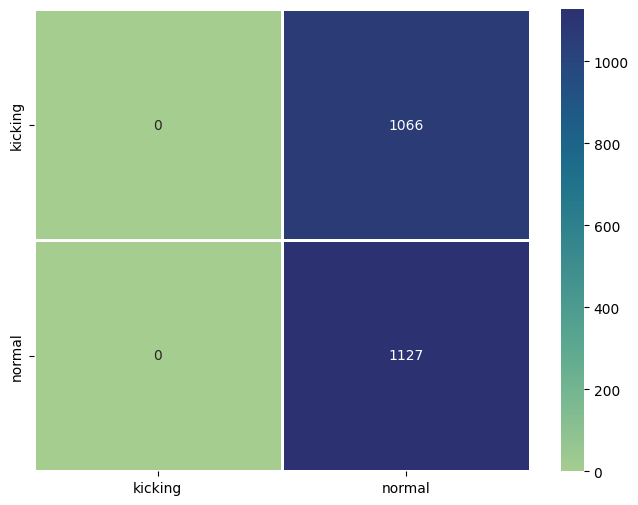

In [31]:
KNN_cm = eval_df[ eval_df["Model"] == 'NB' ]["Confusion Matrix"].values[0]

cm_array_df = pd.DataFrame(KNN_cm, index=["kicking", "normal"], columns=["kicking", "normal"])

fig, ax = plt.subplots(figsize=(8,6)) 
sns.heatmap(cm_array_df, linewidths=1, annot=True, ax=ax, fmt='g', cmap="crest")

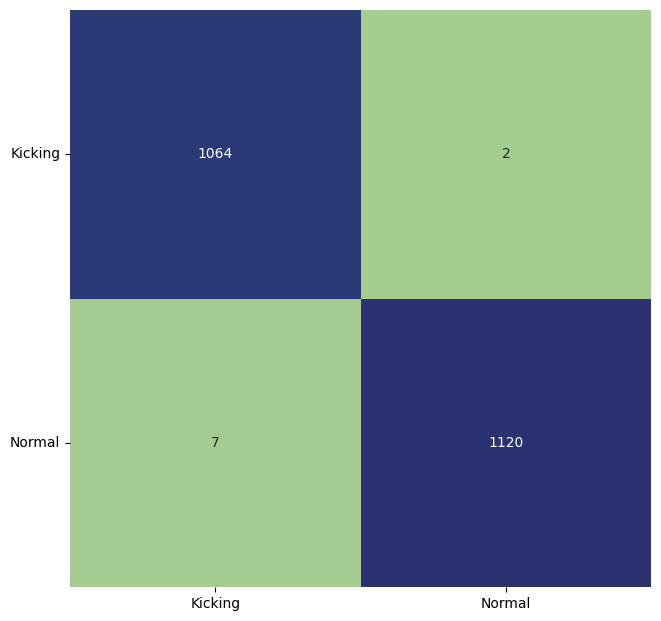

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the counts for each class
kicking_kicking = 1064
kicking_normal = 2
normal_normal = 1120
normal_kicking = 7

# Create the confusion matrix
conf_matrix = [[kicking_kicking, kicking_normal],
               [normal_kicking, normal_normal]]

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(7.5, 7.5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', cbar=False)

# Center the labels along the bars
plt.xticks([0.5, 1.5], ['Kicking', 'Normal'], rotation=0)
plt.yticks([0.5, 1.5], ['Kicking', 'Normal'], rotation=0)

plt.show()


In [33]:
def to_labels(y_pred, y_pred_proba, threshold):
    results = []

    for index, predicted_class in enumerate(y_pred):
        prediction_probabilities = y_pred_proba[index]
        class_prediction_probability = round(prediction_probabilities[np.argmax(prediction_probabilities)], 2)

        results.append(predicted_class if class_prediction_probability >= threshold else -1)
    
    return results


def calculate_correlation_score_confidence(test_x, test_y):
    y_predictions = best_model.predict(test_x)
    y_predict_proba = best_model.predict_proba(test_x)

    thresholds = list(np.arange(0, 1.05, 0.01))

    f1_score_results = []

    for threshold in thresholds:
        true_predictions = to_labels(y_predictions, y_predict_proba, threshold)
        f1_s = list(f1_score(test_y, true_predictions, labels=[0, 1], average=None))
        all_class_f1 = f1_score(test_y, true_predictions, labels=[0, 1], average="weighted")
        f1_s.append(all_class_f1)
        f1_score_results.append(f1_s)
    
    return thresholds, f1_score_results

C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


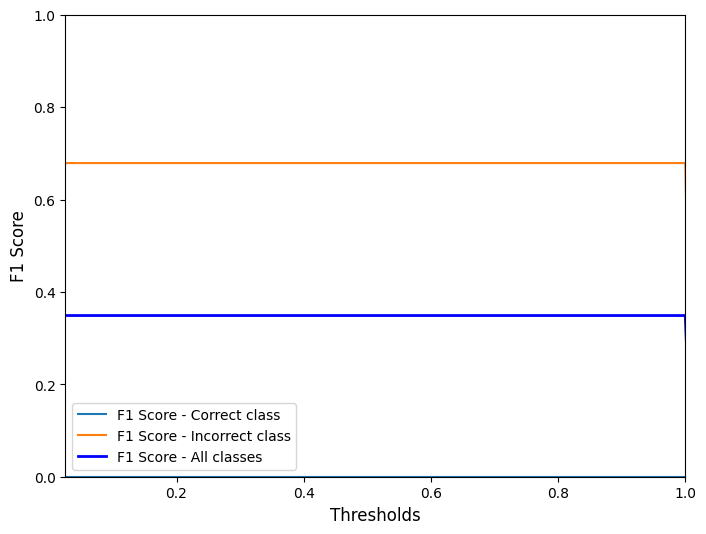

In [34]:
thresholds, f1_scores = calculate_correlation_score_confidence(test_x, test_y)

first_class = [ el[0] for el in f1_scores ]
second_class = [ el[1] for el in f1_scores ]
all_classes = [ el[2] for el in f1_scores ]

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(thresholds, first_class, label = "F1 Score - Correct class")
plt.plot(thresholds, second_class, label = "F1 Score - Incorrect class")
plt.plot(thresholds, all_classes, label = "F1 Score - All classes", linewidth=2.0, color="blue")
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.xlim([0.025, 1])
plt.xlabel("Thresholds", fontsize = 12)
plt.ylabel("F1 Score", fontsize = 12)
# plt.axvline(thresholds[np.argmin(abs(precision-recall))], color="k", ls = "--")
# plt.title(label = F"Threshold = {thresholds[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
plt.show()

Optimal Threshold: 0.99999999997533


C:\Users\OS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


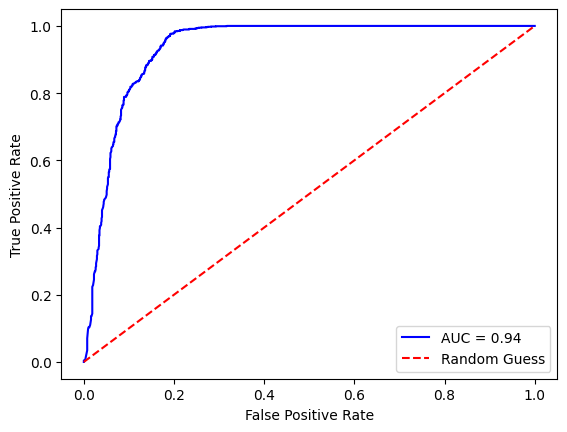

In [35]:
probs = best_model.predict_proba(test_x)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Random Guess")
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

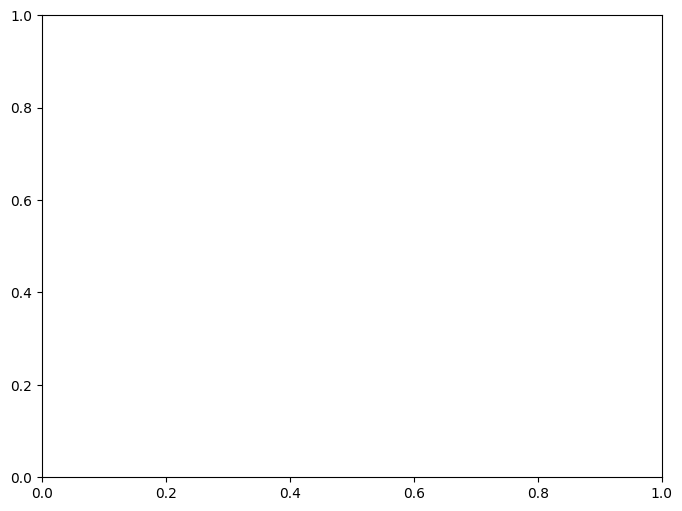

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the function calculate_correlation_score_confidence defined
# Function to calculate F1 scores and thresholds
def calculate_correlation_score_confidence(test_x, test_y):
    # Your implementation here
    # Return valid data like thresholds and f1_scores
    thresholds = [0.1, 0.2, 0.3, 0.4]  # Example thresholds
    f1_scores = [[0.6, 0.7, 0.5], [0.5, 0.6, 0.4]]  # Example F1 scores for different classes
    return thresholds, f1_scores

# Example usage
result = calculate_correlation_score_confidence(test_x, test_y)

if result is not None:
    thresholds, f1_scores = result

    first_class = [el[0] for el in f1_scores]
    second_class = [el[1] for el in f1_scores]
    all_classes = [el[2] for el in f1_scores]

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(thresholds, first_class, label="F1 Score - Correct class")
    plt.plot(thresholds, second_class, label="F1 Score - Incorrect class")
    plt.plot(thresholds, all_classes, label="F1 Score - All classes", linewidth=2.0, color="blue")

    # Find the threshold at which F1 score is closest to 0.5
    target_index = np.argmin(np.abs(np.array(all_classes) - 0.5))
    target_threshold = thresholds[target_index]

    # Plot vertical line at F1 score of 0.5
    plt.axvline(target_threshold, color="k", linestyle="--", label="Threshold at F1=0.5")
    plt.text(target_threshold + 0.01, 0.5, f'Threshold = {target_threshold:.3f}', rotation=90, verticalalignment='center')

    plt.legend(loc='lower left')
    plt.ylim([0, 1])
    plt.xlim([0.025, 1])
    plt.xlabel("Thresholds", fontsize=12)
    plt.ylabel("F1 Score", fontsize=12)
    plt.show()
else:
    print("Error: No data returned from calculate_correlation_score_confidence")
